You should consider upgrading via the 'C:\Users\uppal\anaconda3\python.exe -m pip install --upgrade pip' command.


Dataset loaded successfully!
0    9984
1      16
Name: Class, dtype: int64
Memory Usage: 84.5% | Available: 1223.25 MB
✅ Training XGBoost Model...


C:\Users\uppal\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:42:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Memory Usage: 85.5% | Available: 1144.00 MB
✅ Evaluating XGBoost...

--- XGBoost Classifier ---
Precision: 1.0000
Recall: 0.6667
F1-score: 0.8000
AUC-ROC: 0.8333
✅ Confusion Matrix...


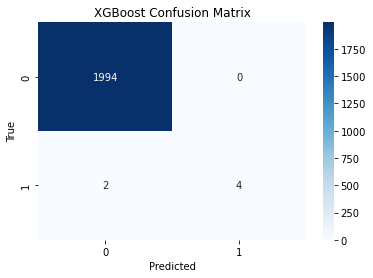

✅ Saving Results...
Results saved to: creditcard_fraud_xgboost_results.csv


In [15]:
!pip install xgboost
# -------------------------------------
# 📥 Import Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
import xgboost as xgb
import seaborn as sns
import psutil

# -------------------------------------
# 📂 Load and Preprocess Dataset
# -------------------------------------
print("✅ Loading and Preprocessing Data...")

file_path = r"D:\Website Codes\creditcard.csv\creditcard.csv"
data = pd.read_csv(file_path).sample(n=10000, random_state=42)

print("Dataset loaded successfully!")
print(data['Class'].value_counts())

# Separate features and labels
X = data.drop(columns=['Class'])
y = data['Class']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Memory log
def log_memory_usage():
    mem = psutil.virtual_memory()
    print(f"Memory Usage: {mem.percent}% | Available: {mem.available / 1024 ** 2:.2f} MB")

log_memory_usage()

# -------------------------------------
# 🚀 Train XGBoost Classifier
# -------------------------------------
print("✅ Training XGBoost Model...")

xgb_clf = xgb.XGBClassifier(
    scale_pos_weight= (y == 0).sum() / (y == 1).sum(),  # handle class imbalance
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

log_memory_usage()

# -------------------------------------
# ✅ Evaluation
# -------------------------------------
print("✅ Evaluating XGBoost...")

def evaluate_model(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    pr_auc = roc_auc_score(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {pr_auc:.4f}")

    return precision, recall, f1, pr_auc

xgb_metrics = evaluate_model(y_test, y_pred_xgb, "XGBoost Classifier")

# -------------------------------------
# 📊 Confusion Matrix
# -------------------------------------
print("✅ Confusion Matrix...")

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

# -------------------------------------
# 📉 Save Results to CSV
# -------------------------------------
print("✅ Saving Results...")

results = pd.DataFrame({
    "True_Label": y_test,
    "XGBoost_Prediction": y_pred_xgb
})
results.to_csv("creditcard_fraud_xgboost_results.csv", index=False)
print("Results saved to: creditcard_fraud_xgboost_results.csv")
